In [1]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats
import commands

In [2]:
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
sub_path = dir_path+"data/external/R21_39_Cyl_Aqueous/"
img_path = dir_path+"data/processed/"

# Create mask

In [5]:
def create_mask(sub_path, base_runs):
    for m in range(len(base_runs)):
        cwd_path = sub_path+"NIFTI/bmaps_numpy/"
        for n in range(len(base_runs[m])):
            bdir = cwd_path+"base_run_"+base_runs[m][n]+"/"
            print commands.getoutput("fslmaths "+bdir+"4d_fmap_Mean.nii.gz -div "+bdir+"4d_fmap_Mean.nii.gz "+bdir+"mask.nii.gz")
            print commands.getoutput("3dmaskdump -o "+bdir+"/mask.txt -xyz -nozero "+bdir+"mask.nii.gz")

In [7]:
# 39
base_runs = [
 ['4', '6', '8', '10', '12'],
 ['14', '16', '18', '20', '22'],
 ['24', '26', '28', '30', '32'],
 ['34', '36', '38', '40', '42'],
 ['44', '46', '48', '50', '52'],
 ['56', '58', '60', '62', '64']]
bp = [['6','4'],['10','4'],['6','10']],[['16','14'],['20','14'],['16','20']],[['26','24'],['30','24'],['26','30']],[['36','34'],['40','34'],['36','40']],[['46','44'],['50','44'],['46','50']],[['58','56'],['62','56'],['58','62']]
create_mask(sub_path, base_runs)


++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the entire dataset (no mask)

++ 3dmaskdump: AFNI version=AFNI_22.1.14 (Jun 24 2022) [64-bit]
++ 180224 voxels in the

# Physics image

In [26]:
def create_erode_image(sub_path, erode = "1", xminusy = "6minus4"):
    cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy
    #print commands.getoutput("3dcalc -a "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode1.nii.gz -b a+i -c a-i -d a+j -e a-j -f a+k -g a-k -expr 'a*(1-amongst(0,b,c,d,e,f,g))'")
    print commands.getoutput("3dmask_tool -input "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode"+erode+".nii.gz -dilate_result -"+erode)
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+cwd+"/4d_fmap_Mean.nii.gz "+cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+cwd+"/Bvals.nii "+cwd+"/Bvals_erode"+erode+".nii.gz")
#     img_meas = nib.load(cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
#     img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")

In [27]:
create_erode_image(sub_path, "1", "6minus4")

++ no -frac option: defaulting to -union
++ processing 1 input dataset(s), NN=2...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 35249 survived, 144975 were zero
++ writing result mask_erode1.nii.gz...
++ Output dataset /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_39_Cyl_Aqueous/NIFTI/bmaps_numpy/6minus4/mask_erode1.nii.gz




In [28]:
create_erode_image(sub_path, "1", "36minus34")

++ no -frac option: defaulting to -union
++ processing 1 input dataset(s), NN=2...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 35248 survived, 144976 were zero
++ writing result mask_erode1.nii.gz...
++ Output dataset /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_39_Cyl_Aqueous/NIFTI/bmaps_numpy/36minus34/mask_erode1.nii.gz




In [29]:
create_erode_image(sub_path, "1", "58minus56")

++ no -frac option: defaulting to -union
++ processing 1 input dataset(s), NN=2...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 35247 survived, 144977 were zero
++ writing result mask_erode1.nii.gz...
++ Output dataset /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_39_Cyl_Aqueous/NIFTI/bmaps_numpy/58minus56/mask_erode1.nii.gz




# Prediction image

In [3]:
sub_path = dir_path+"data/external/R21_36_Cyl_Aqueous/"

In [4]:
def create_predict_erode(sub_path, img_path, erode_path, erode='1', xminusy = "6minus4"):
    cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+img_path+" "+erode_path)
    

In [7]:
xminusy = "6minus4" 
pred_path = img_path+"predicted_nn_neg_nonzero_pos.nii.gz"
erode_path = img_path+"predicted_nn_neg_nonzero_pos_erode.nii.gz"
print create_predict_erode(sub_path, pred_path, erode_path, '1', xminusy)


None


In [8]:
xminusy = "6minus4" 
pred_path = img_path+"predicted_nn_neg_nonzero_neg.nii.gz"
erode_path = img_path+"predicted_nn_neg_nonzero_neg_erode.nii.gz"
print create_predict_erode(sub_path, pred_path, erode_path, '1', xminusy)


None


# Create graph for erode

## Physics vs Theory

r: 0.01148, st_er: 0.024306
y = 0.1185*x + 1.1952


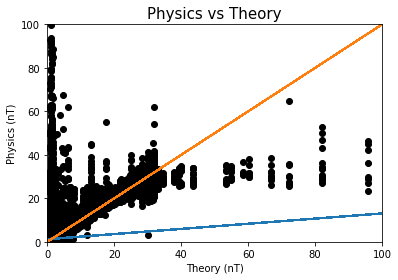

In [24]:
xminusy = "36minus34" 
xminusy = "58minus56" # run 6
cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy

# Non erode
img_meas = nib.load(cwd+"/4d_fmap_Mean.nii.gz")
img_theo = nib.load(cwd+"/Bvals.nii")

data_meas = img_meas.get_data()
data_theo = img_theo.get_data()
x = data_theo.flatten()
y = data_meas.flatten()

m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Physics (nT)")
plt.title("Physics vs Theory", fontsize=15)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

r: 0.04969, st_er: 0.049196
y = 1.0391*x + -0.1391


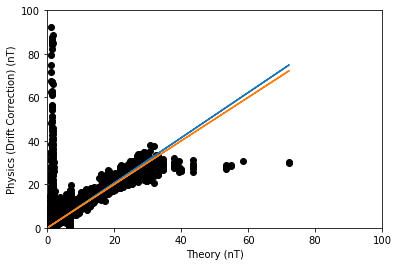

In [42]:
xminusy = "36minus34" 
xminusy = "58minus56" # run 6
erode = '1'
cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy

# Erode
img_meas = nib.load(cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")

data_meas = img_meas.get_data()
data_theo = img_theo.get_data()
x = data_theo.flatten()
y = data_meas.flatten()

m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
# plt.ylabel("Physics (nT)")
plt.ylabel("Physics (Drift Correction) (nT)")
# plt.title("Drift Corrected Physics vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

## Predict vs Theory

r: 0.96135, st_er: 0.000622
y = 0.9223*x + 0.0125


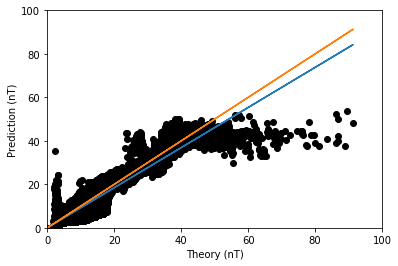

In [11]:
img_pred = nib.load(img_path+"predicted_nn_neg_nonzero_pos_erode.nii.gz")
data_pred = img_pred.get_data()


xminusy = "6minus4" 
erode = '1'
cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy
img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")
data_theo = img_theo.get_data()


x = data_theo.flatten()
y = data_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# plt.title("Neural Network Prediction vs Theory (erode)", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

In [33]:
np.corrcoef(x, y)

array([[1.        , 0.95432785],
       [0.95432785, 1.        ]])

In [31]:
cwd

'/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_39_Cyl_Aqueous/NIFTI/bmaps_numpy/6minus4'

# Play ground

In [ ]:
# command line
#fslroi Bvals.nii crop_bval_11_33_28_42_6_55.nii.gz 11 22 28 16 6 49
#fslroi predicted_nn_nonzero_36to38.nii crop_pred_11_33_28_42_6_55.nii.gz 11 22 28 16 6 49

In [12]:
tdir = '/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/data/external/R21_36_Cyl_Aqueous/NIFTI/bmaps_numpy/56minus54/'

In [13]:
pred_img = nib.load(tdir+"crop_pred_11_33_28_42_6_55.nii.gz")
bval_img = nib.load(tdir+"crop_bval_11_33_28_42_6_55.nii.gz")

In [19]:
pred_data = pred_img.get_data()
bval_data = bval_img.get_data()

In [17]:
pred_data.flatten()

array([4.6401663, 4.2926555, 3.8183494, ..., 3.4961429, 3.8389475,
       3.8791254], dtype=float32)

r: 0.92168, st_er: 0.002415
y = 0.7536*x + 0.9555


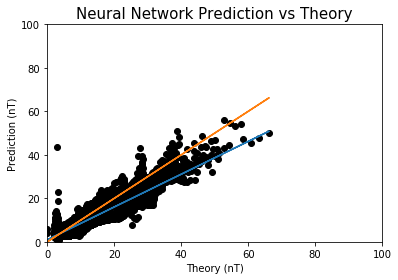

In [21]:
x = bval_data.flatten()
y = pred_data.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))